In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./OBS_AWS_TIM_20220120173824.csv', encoding='cp949')
data.head(3)

,지점,지점명,일시,풍향(deg),풍속(m/s)
0,116,관악(레),2021-06-01 01:00,143.5,5.4
1,116,관악(레),2021-06-01 02:00,140.5,5.2
2,116,관악(레),2021-06-01 03:00,156.3,6.6


In [3]:
data['u_vec'] = data['풍속(m/s)'] * np.cos(np.deg2rad(data['풍향(deg)']))
data['v_vec'] = data['풍속(m/s)'] * np.sin(np.deg2rad(data['풍향(deg)']))

In [4]:
data.head(5)

,지점,지점명,일시,풍향(deg),풍속(m/s),u_vec,v_vec
0,116,관악(레),2021-06-01 01:00,143.5,5.4,-4.340827,3.212043
1,116,관악(레),2021-06-01 02:00,140.5,5.2,-4.012448,3.307607
2,116,관악(레),2021-06-01 03:00,156.3,6.6,-6.043373,2.652855
3,116,관악(레),2021-06-01 04:00,175.8,7.3,-7.280396,0.534639
4,116,관악(레),2021-06-01 05:00,184.3,4.7,-4.686770,-0.352400


In [5]:
import datetime

time_format = '%Y-%m-%d %H:%M'
data['일시'] = data['일시'].map(lambda x: datetime.datetime.strptime(x, time_format))

In [68]:
agg_data = data.groupby([data['지점명'], data['일시'].dt.hour]).mean().loc[:,['u_vec', 'v_vec']]

In [69]:
print(agg_data.to_numpy().shape)
agg_data.to_numpy()

(672, 2)


array([[-0.02297857, -0.01748589],
       [ 0.05060748, -0.12888949],
       [ 0.03006753, -0.02818576],
       ...,
       [-0.21380157, -0.26332614],
       [-0.16288884, -0.29119815],
       [-0.10205296, -0.1986268 ]])

In [130]:
data['지점명'].unique()

array(['관악(레)', '강남', '서초', '강동', '송파', '강서', '양천', '도봉', '노원', '동대문',
       '중랑', '기상청', '마포', '서대문', '광진', '성북', '용산', '은평', '금천', '한강', '중구',
       '성동', '구로', '강북', '남현', '관악', '영등포 ', '현충원'], dtype=object)

In [ ]:
U, Sigma, Vt = svd(mat_gangnam)
print(U.shape, Sigma.shape, Vt.shape)

In [138]:
mat_ = agg_data.loc['강동',:].to_numpy()
print(mat_.shape)

(24, 2)


In [140]:
def draw_quiver(data):
    fig = plt.figure(figsize=(15,5))
    x = np.arange(24)
    y = 0

    q = plt.quiver(x, y, data[:,0], data[:,1],
                units = 'xy', scale = 0.5, color = 'k')
    plt.quiverkey(q, 0.95, 0.87, 1, label = r'$1ms^{-1}$')

    plt.xticks(np.arange(24))
    plt.yticks([0], [' '], fontsize = 15)
    plt.xlim(-1, 24.1)
    plt.ylim(-0.5, 0.5)

    #plt.title("Non-SVD", fontsize = 15)
    plt.grid(linestyle = ':')
    plt.show()

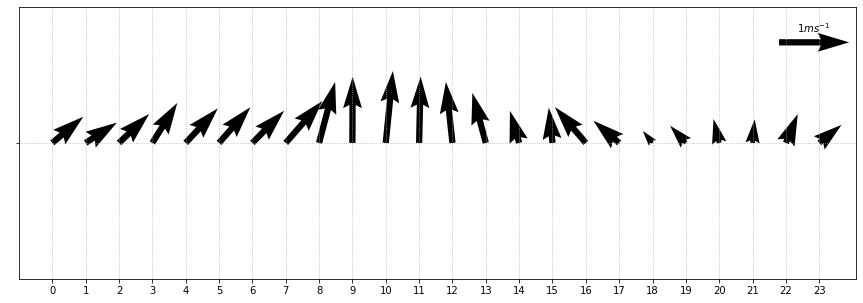

In [141]:
draw_quiver(mat_)

In [142]:
from numpy.linalg import svd

In [151]:
class svd_analysis:
    def __init__(self, matrix):
        self.matrix = matrix
        self.U = None
        self.Sigma = None
        self.Vt = None
        
    def fit(self):
        '''
        numpy의 svd 함수를 사용하여 행렬 분해 하는 함수
        
        return
        ------
        U, Sigma, Vt
        '''
        
        self.U, self.Sigma, self.Vt = svd(self.matrix)
        print(f'Matrix: {self.matrix.shape} -> U: {self.U.shape}, Sigma: {self.Sigma.shape}, Vt: {self.Vt.shape}')
    
    def transform(self, ind):
        '''
        분해한 행렬을 ind에 해당하는 특이값으로 조합하는 함수
        
        params
        ------
        ind : index of singular_value
        
        return
        ------
        a_ : index-th component matrix
        '''
        U_ = self.U[:,ind].reshape(self.U.shape[0], 1)
        Sigma_ = self.Sigma[ind].reshape(1,1)
        Vt_ = self.Vt[ind].reshape(1, self.Vt.shape[-1])
        
        a_ = np.dot(np.dot(U_, Sigma_), Vt_)
        print(f'{U_.shape} {Sigma_.shape} {Vt_.shape} ->  {a_.shape}')
        return a_

    def fit_transform(self, ind):
        svd_analysis.fit(self)
        a_ = svd_analysis.transform(self, ind)
        return a_

In [154]:
sa = svd_analysis(mat_)
sa.fit()
first_component = sa.transform(0)
second_component = sa.transform(1)

Matrix: (24, 2) -> U: (24, 24), Sigma: (2,), Vt: (2, 2)
(24, 1) (1, 1) (1, 2) ->  (24, 2)
(24, 1) (1, 1) (1, 2) ->  (24, 2)


In [155]:
sa = svd_analysis(mat_)
first_component = sa.fit_transform(0)
second_component = sa.transform(1)

Matrix: (24, 2) -> U: (24, 24), Sigma: (2,), Vt: (2, 2)
(24, 1) (1, 1) (1, 2) ->  (24, 2)
(24, 1) (1, 1) (1, 2) ->  (24, 2)


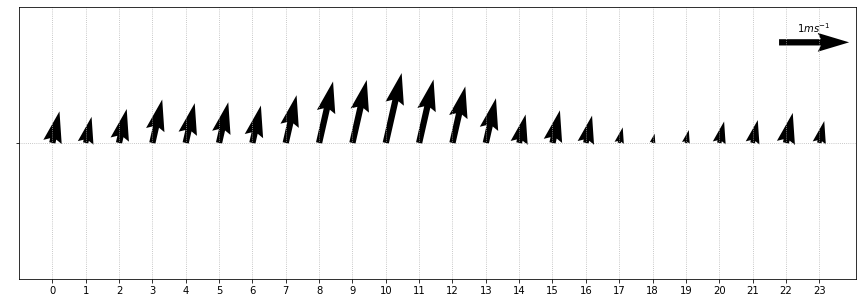

In [156]:
draw_quiver(first_component) # 지금은 아마 u성분, v성분 두개로 나누어졌을거라 생각됨.

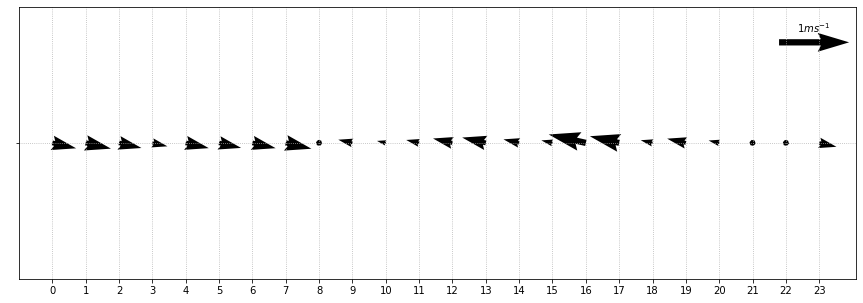

In [157]:
draw_quiver(second_component)

In [161]:
print(first_component[0])
print(second_component[0])
print(mat_[0])
# 첫번째 성분과 두번째 성분을 더하면 기존 행렬이 됨.
# 특이값을 정보량으로 생각한다면, 강동은 v성분이 우세한 것이 나타남.
# 그러나 기상학에서 SVD는 주로 공간적 패턴과 같이 사용하며 지금은 단지 SVD 실험이라 위 결과들은 큰 의미가 없음.

[0.1024624  0.45033483]
[ 0.33999985 -0.07735844]
[0.44246225 0.37297639]


In [165]:
mat_3station = agg_data.loc[['강남', '송파', '강동']].to_numpy()
mat_3station.shape

(72, 2)

In [241]:
mat_3station = mat_3station.reshape(24, -1, 2)
mat_3station_u = mat_3station[:,:,0]
mat_3station_v = mat_3station[:,:,1]

In [189]:
sa_u = svd_analysis(mat_3station_u)
first_component_u = sa_u.fit_transform(0)
second_component_u = sa_u.transform(1)
third_component_u = sa_u.transform(2)

sa_v = svd_analysis(mat_3station_v)
first_component_v = sa_v.fit_transform(0)
second_component_v = sa_v.transform(1)
third_component_v = sa_v.transform(2)

Matrix: (24, 3) -> U: (24, 24), Sigma: (3,), Vt: (3, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)
Matrix: (24, 3) -> U: (24, 24), Sigma: (3,), Vt: (3, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)
(24, 1) (1, 1) (1, 3) ->  (24, 3)


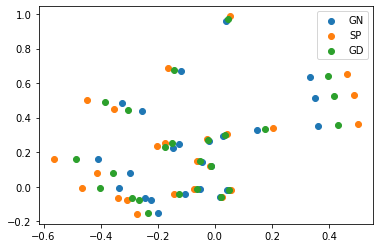

In [190]:
stn = ['GN', 'SP', 'GD']
for i in range(3):
    plt.scatter(first_component_u[:,i], first_component_v[:,i], label=stn[i])
plt.legend()
plt.show()
# 첫 번째 성분은 크기는 조금 차이나지만 같은 방향성을 띄고 있음을 알 수 있음. 

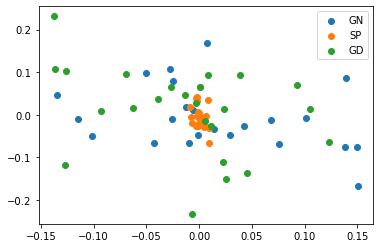

In [191]:
stn = ['GN', 'SP', 'GD']
for i in range(3):
    plt.scatter(second_component_u[:,i], second_component_v[:,i], label=stn[i])
plt.legend()
plt.show()

# 두 번째 성분은 송파 관측소에서 차이가 두드러지게 나타남. (송파의 두 번째 성분은 작음)

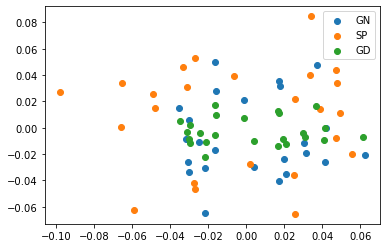

In [192]:
stn = ['GN', 'SP', 'GD']
for i in range(3):
    plt.scatter(third_component_u[:,i], third_component_v[:,i], label=stn[i])
plt.legend()
plt.show()

In [211]:
second_u = second_component_u.reshape(second_component_u.shape[0], -1, second_component_u.shape[1])
second_v = second_component_v.reshape(second_component_v.shape[0], -1, second_component_v.shape[1])

In [228]:
first_u = first_component_u.reshape(first_component_u.shape[0], -1, first_component_u.shape[1])
first_v = first_component_v.reshape(first_component_v.shape[0], -1, first_component_v.shape[1])

In [229]:
second = np.concatenate((second_u, second_v), axis=1)
first = np.concatenate((first_u, first_v), axis=1)
second.shape

(24, 2, 3)

In [224]:
def draw_quiver(data):
    fig = plt.figure(figsize=(15,5))
    x = np.arange(24)
    y = 0

    q = plt.quiver(x, y, data[:,0], data[:,1],
                units = 'xy', scale = 0.1, color = 'k')
    plt.quiverkey(q, 0.95, 0.87, 0.1, label = r'$0.1ms^{-1}$')

    plt.xticks(np.arange(24))
    plt.yticks([0], [' '], fontsize = 15)
    plt.xlim(-1, 24.1)
    plt.ylim(-0.5, 0.5)

    #plt.title("Non-SVD", fontsize = 15)
    plt.grid(linestyle = ':')
    plt.show()

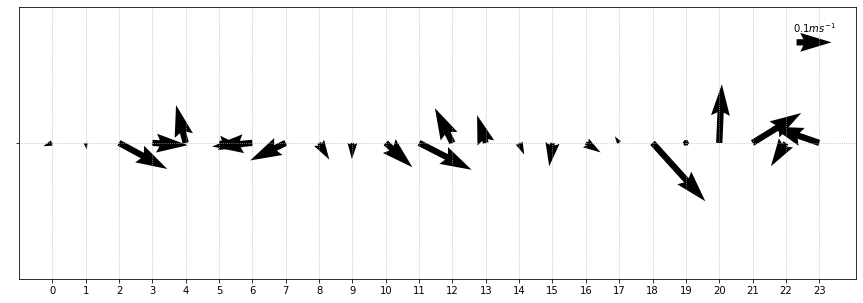

In [225]:
draw_quiver(second[:,:,0])

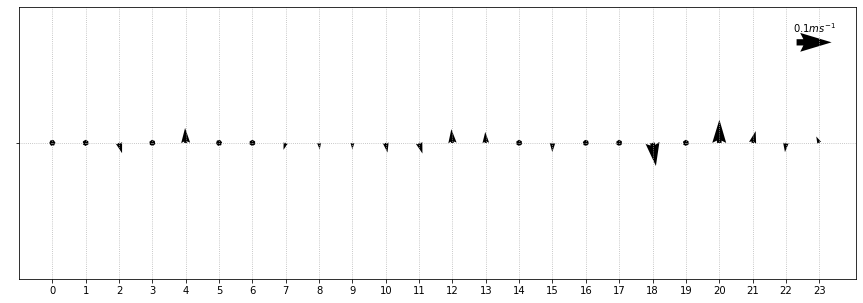

In [226]:
draw_quiver(second[:,:,1])

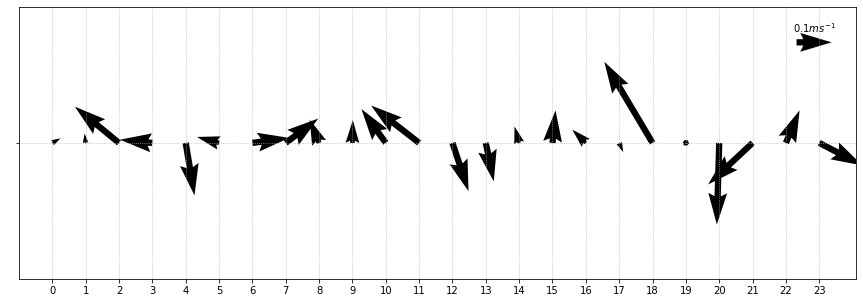

In [227]:
draw_quiver(second[:,:,2])

In [231]:
def draw_quiver(data):
    fig = plt.figure(figsize=(15,5))
    x = np.arange(24)
    y = 0

    q = plt.quiver(x, y, data[:,0], data[:,1],
                units = 'xy', scale = 0.5, color = 'k')
    plt.quiverkey(q, 0.95, 0.87, 0.5, label = r'$0.1ms^{-1}$')

    plt.xticks(np.arange(24))
    plt.yticks([0], [' '], fontsize = 15)
    plt.xlim(-1, 24.1)
    plt.ylim(-0.5, 0.5)

    #plt.title("Non-SVD", fontsize = 15)
    plt.grid(linestyle = ':')
    plt.show()

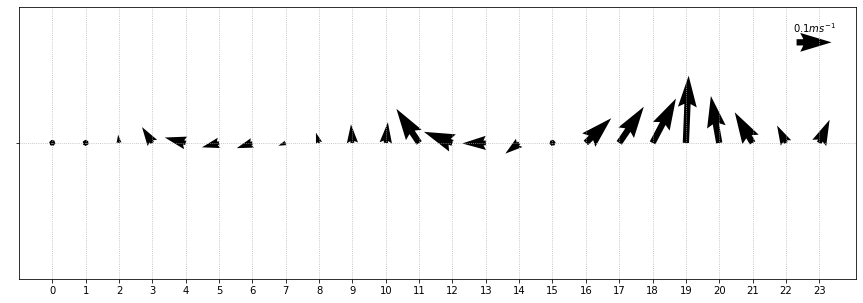

In [232]:
draw_quiver(first[:,:,0])

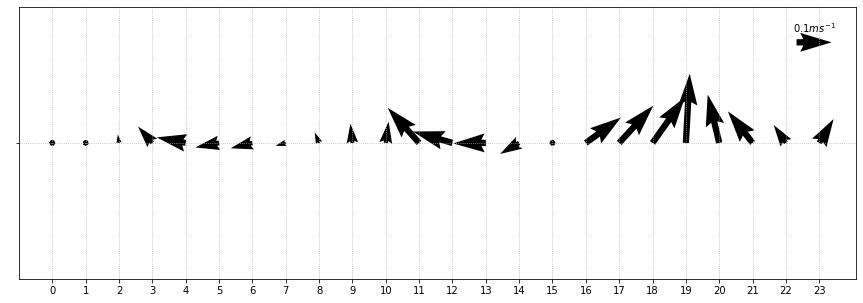

In [233]:
draw_quiver(first[:,:,1])

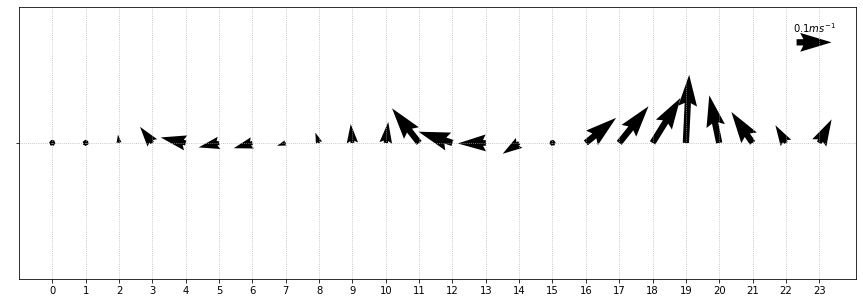

In [234]:
draw_quiver(first[:,:,2])

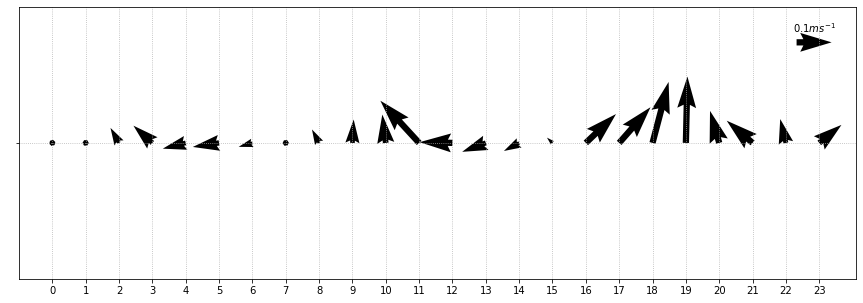

In [240]:
draw_quiver(mat_3station[:,2,:])

In [242]:
mat_all_station = agg_data.to_numpy()
mat_all_station.shape

(672, 2)

In [243]:
mat_all_station = mat_all_station.reshape(24, -1, 2)
mat_all_station_u = mat_all_station[:,:,0]
mat_all_station_v = mat_all_station[:,:,1]

In [244]:
sa_u = svd_analysis(mat_all_station_u)
first_component_u = sa_u.fit_transform(0)
second_component_u = sa_u.transform(1)
third_component_u = sa_u.transform(2)

sa_v = svd_analysis(mat_all_station_v)
first_component_v = sa_v.fit_transform(0)
second_component_v = sa_v.transform(1)
third_component_v = sa_v.transform(2)

Matrix: (24, 28) -> U: (24, 24), Sigma: (24,), Vt: (28, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)
Matrix: (24, 28) -> U: (24, 24), Sigma: (24,), Vt: (28, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)
(24, 1) (1, 1) (1, 28) ->  (24, 28)


In [264]:
stn = agg_data.index[::24].get_level_values('지점명')

Index(['강남', '강동', '강북', '강서', '관악', '관악(레)', '광진', '구로', '금천', '기상청', '남현',
       '노원', '도봉', '동대문', '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포 ',
       '용산', '은평', '중구', '중랑', '한강', '현충원'],
      dtype='object', name='지점명')

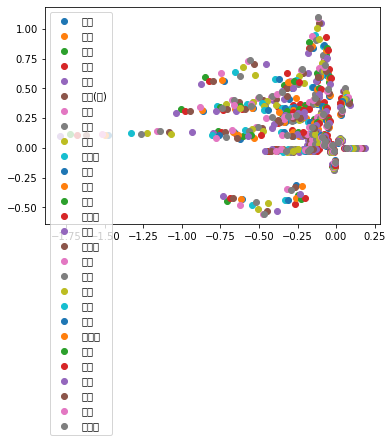

In [273]:
stn = agg_data.index[::24].get_level_values('지점명')
for i in range(len(stn)):
    plt.scatter(first_component_u[:,i], first_component_v[:,i], label=stn[i])
plt.legend()
plt.show()
# 가장 많은 정보

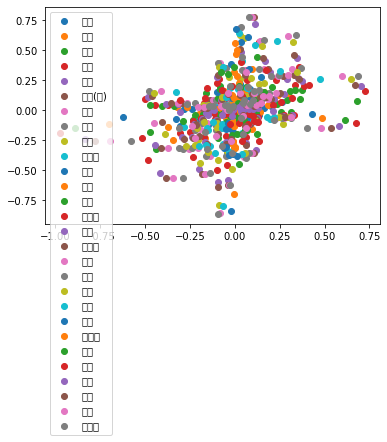

In [269]:
stn = agg_data.index[::24].get_level_values('지점명')
for i in range(len(stn)):
    plt.scatter(second_component_u[:,i], second_component_v[:,i], label=stn[i])
plt.legend()
plt.show()
# ?

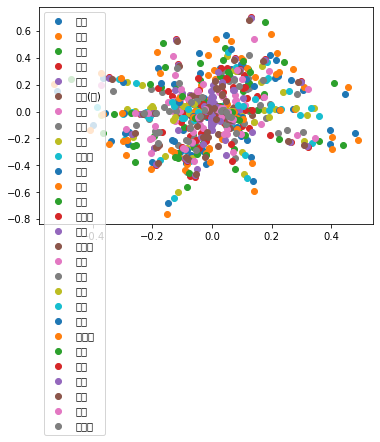

In [270]:
stn = agg_data.index[::24].get_level_values('지점명')
for i in range(len(stn)):
    plt.scatter(third_component_u[:,i], third_component_v[:,i], label=stn[i])
plt.legend()
plt.show()
# 노이즈가 아닐까?